Les machines à vecteurs de support (SVM : Support Vector Machines) sont une classe des méthodes d’apprentissage statistique basées sur le principe de la maximisation de la marge (séparation des classes). Il existe plusieurs formulations (linéaires, versions à noyaux) qui peuvent s’appliquer sur des données séparables (linéairement) mais aussi sur
des données non séparables. L'avantage des SVM est qu'ils n'utilisent pas tous les échantillons d’apprentissage, mais seulement une partie (les vecteurs de support). En conséquence, ces algorithmes demandent moins de mémoire. Dans Scikit-learn, les SVM sont implémentées dans le module sklearn.svm. Nous allons utiliser le jeu de données Iris

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
# Chargement des données
iris = datasets.load_iris()

Nous ne conservons que les deux premiers colonnes de notre data (longueur et largeur des sépales) :

In [153]:
X, y = iris.data[:, :2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Nous Changeons la valeur du paramètre de régularisation.

In [154]:
C = 1# paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
lin_svc.predict(X_test)
lin_svc.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.6133333333333333

In [155]:
C = 10 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
lin_svc.predict(X_test)
lin_svc.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.6266666666666667

Text(0.5, 1.0, 'LinearSVC')

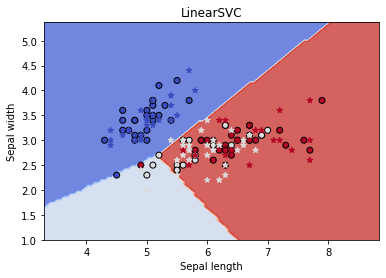

In [156]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='black',
c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test,
cmap=plt.cm.coolwarm)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")



In [157]:
C = 100 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
lin_svc.predict(X_test)
lin_svc.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.84

Text(0.5, 1.0, 'LinearSVC')

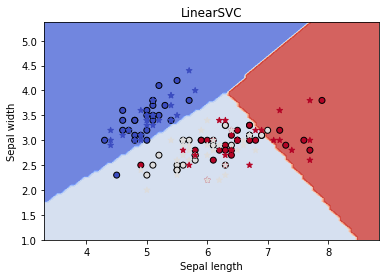

In [158]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='black',
c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test,
cmap=plt.cm.coolwarm)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

In [159]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1,1,10,100, 1000], 
              } 
  
grid = GridSearchCV(svm.LinearSVC(), param_grid)
grid.fit(X_train,y_train)
print("Meilleur score : " + str(grid.best_estimator_.score(X_test, y_test)))
print("La meilleur valeur de C: " + str(grid.best_estimator_.C))

Meilleur score : 0.84
La meilleur valeur de C: 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Le classifieur produit des frontières de décision linéaire. Cela suffit à séparer une des trois classes des deux autres, toutefois en ne considérant que les deux premiers attributs, les
deux autres classes ne semblent pas linéairement séparables. Il faudrait soit utiliser un modèle non linéaire, soit ajouter des attributs supplémentaires en espérant qu’ils
permettront de séparer linéairement les deux classes restantes. Les modèles linéaires LinearSVC() et SVC(kernel='linear'), produisent des résultats légèrement différents à cause
du fait qu’ils optimisent des fonctions de coût différentes mais aussi à cause du fait qu’ils gèrent les problèmes multi-classe de manière différente (linearSVC utilise One-vs-All et
SVC utilise One-vs-One)

In [164]:
C=1
lin_svc=svm.LinearSVC(C=C)
lin_svc.fit(X_train,y_train)
lin_svc.predict(X_test)
lin_svc.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.6133333333333333

Text(0.5, 1.0, 'LinearSVC')

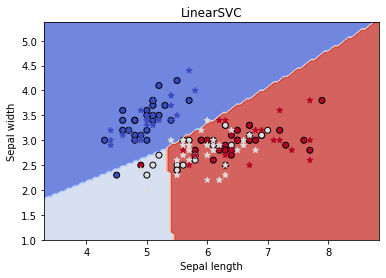

In [165]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='black',
c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test,
cmap=plt.cm.coolwarm)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


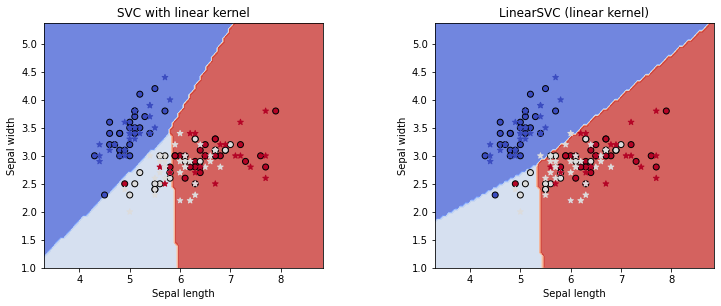

In [166]:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']
fig = plt.figure(figsize=(12, 4.5))
for i, clf in enumerate((svc, lin_svc)):
 plt.subplot(1, 2, i + 1)
 plt.subplots_adjust(wspace=0.4, hspace=0.4)
 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 # Utiliser une palette de couleurs
 Z = Z.reshape(xx.shape)
 plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 # Afficher aussi les points d'apprentissage
 plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k',
c=y_train, cmap=plt.cm.coolwarm)
 plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*',
c=y_test, cmap=plt.cm.coolwarm)
 plt.xlabel('Sepal length')
 plt.ylabel('Sepal width')
 plt.title(titles[i])
plt.show()

In [167]:
print("La précision de SVC avec Linear Kernel",svc.score(X_test,y_test))
print("La précision de LinearSVC",lin_svc.score(X_test,y_test))


La précision de SVC avec Linear Kernel 0.72
La précision de LinearSVC 0.6133333333333333


Question

In [172]:
X1, y1 = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.5)

In [173]:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
lin_svc.predict(X_test)
svc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


array([1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1,
       0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1,
       0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2,
       2, 1, 1, 0, 1, 0, 1, 2, 2])

In [174]:
lin_svc.score(X_test,y_test)

0.8933333333333333

In [175]:
svc.score(X_test,y_test)

0.9866666666666667

# Digits DataSet

In [98]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=0)

In [100]:
digits.data.shape

(1797, 64)

In [107]:
lin_svc = svm.LinearSVC(C=0.001).fit(X_train, y_train)
lin_svc.score(X_test,y_test)

0.9577308120133482

In [84]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1,0.2,1,5,10,20,80, 1000], 
              } 
  
grid = GridSearchCV(svm.LinearSVC(), param_grid)
grid.fit(X_train,y_train)
print("Meilleur score : " + str(grid.best_estimator_.score(X_test, y_test)))
print("La meilleur valeur de C: " + str(grid.best_estimator_.C))


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Meilleur score : 0.9332591768631813
La meilleur valeur de C: 0.1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
